In [1]:
# !pip install tinkoff-investments
# !pip install tsfresh
# !pip install featuretools

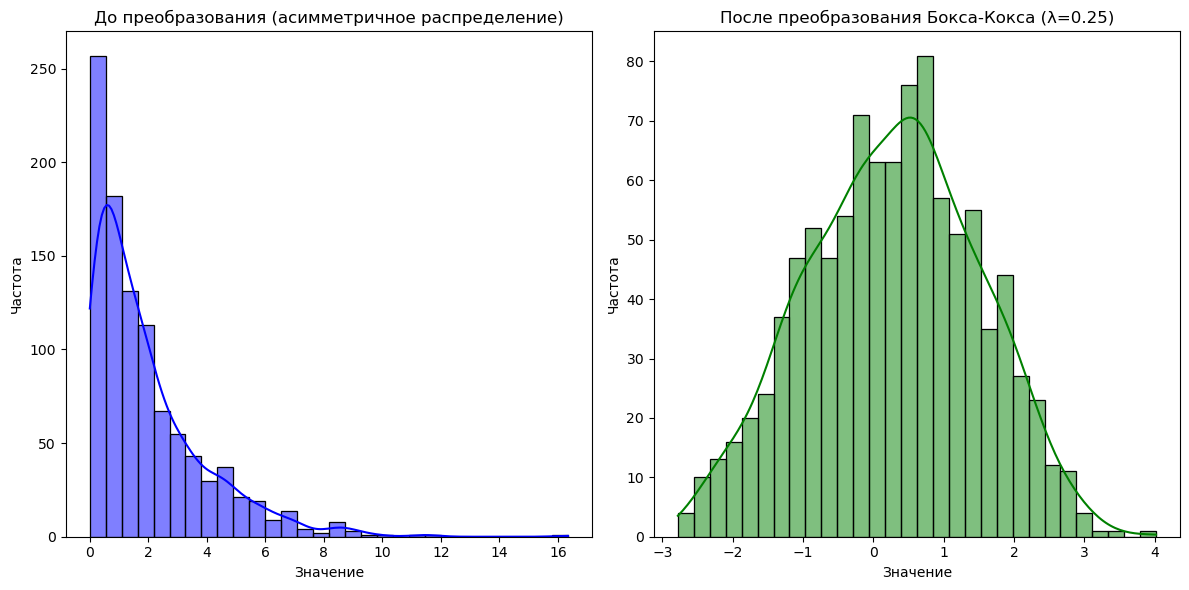

In [107]:
## Бокс-Кокс

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd

# Генерация примера данных с асимметричным распределением (например, доходы)
np.random.seed(42)
data = np.random.exponential(scale=2, size=1000)

# Применение преобразования Бокса-Кокса
data_boxcox, fitted_lambda = stats.boxcox(data)

# Создание графиков до и после преобразования
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# График до преобразования
sns.histplot(data, bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('До преобразования (асимметричное распределение)')
axes[0].set_xlabel('Значение')
axes[0].set_ylabel('Частота')

# График после преобразования
sns.histplot(data_boxcox, bins=30, kde=True, ax=axes[1], color='green')
axes[1].set_title(f'После преобразования Бокса-Кокса (λ={fitted_lambda:.2f})')
axes[1].set_xlabel('Значение')
axes[1].set_ylabel('Частота')

# Отображение графиков
plt.tight_layout()
plt.show()

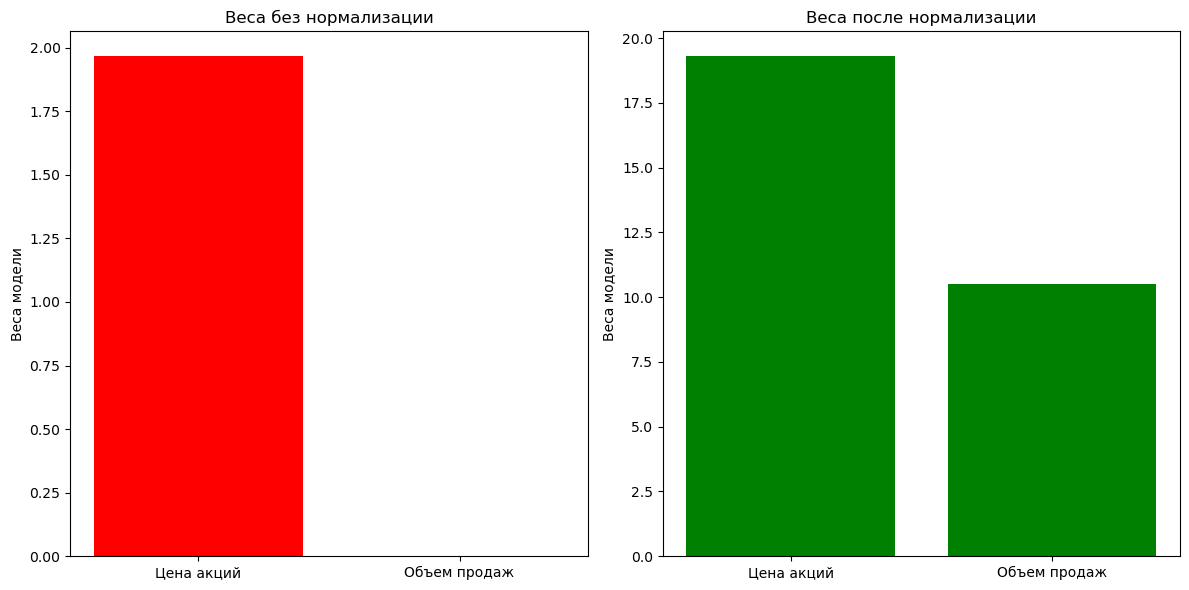

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

# Генерация данных: Цена акций (в диапазоне 0-10 долларов) и объем продаж (в диапазоне 0-1000000)
np.random.seed(42)
prices = np.random.uniform(0, 10, 100)  # Цена акций
volume = np.random.uniform(0, 1000000, 100)  # Объем продаж

# Целевая переменная: предположим, что реальная зависимость y от цен акций и объема продаж линейна
true_weights = [2, 0.00001]  # Истинные веса для признаков
y = true_weights[0] * prices + true_weights[1] * volume + np.random.normal(0, 1, 100)

# Модель линейной регрессии без нормализации
model_no_norm = LinearRegression()
model_no_norm.fit(np.column_stack((prices, volume)), y)
weights_no_norm = model_no_norm.coef_

# Нормализация данных с использованием Min-Max Scaler
scaler = MinMaxScaler()
prices_norm, volume_norm = scaler.fit_transform(np.column_stack((prices, volume))).T

# Модель линейной регрессии после нормализации
model_with_norm = LinearRegression()
model_with_norm.fit(np.column_stack((prices_norm, volume_norm)), y)
weights_with_norm = model_with_norm.coef_

# Визуализация результатов
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# График весов без нормализации
axes[0].bar(['Цена акций', 'Объем продаж'], weights_no_norm, color='red')
axes[0].set_title('Веса без нормализации')
axes[0].set_ylabel('Веса модели')

# График весов после нормализации
axes[1].bar(['Цена акций', 'Объем продаж'], weights_with_norm, color='green')
axes[1].set_title('Веса после нормализации')
axes[1].set_ylabel('Веса модели')

plt.tight_layout()
plt.show()

In [109]:
import warnings
warnings.filterwarnings('ignore')

## Генерация фичей

In [112]:
df = pd.read_csv('data_for_feature_generation.csv')

In [116]:
df

,open,high,close,low,time,volume
0,250,253,251,250,2023-09-24 14:00:00+00:00,1626
1,253,255,251,251,2023-09-24 15:00:00+00:00,1327
2,252,252,252,252,2023-09-25 06:00:00+00:00,2942
3,252,252,250,250,2023-09-25 07:00:00+00:00,605762
4,250,251,251,250,2023-09-25 08:00:00+00:00,226595
...,...,...,...,...,...,...
5158,271,272,272,271,2024-09-23 10:00:00+00:00,494263
5159,272,272,272,271,2024-09-23 11:00:00+00:00,269853
5160,272,272,272,272,2024-09-23 12:00:00+00:00,227769
5161,272,273,273,272,2024-09-23 13:00:00+00:00,375428


In [120]:
df['time'] = pd.to_datetime(df['time'])

<Axes: >

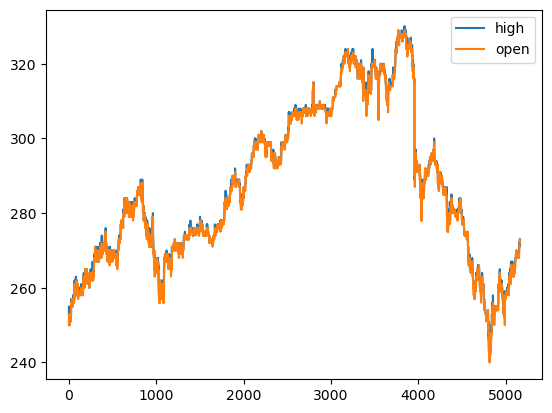

In [122]:
df[['high', 'open']].plot()

<Axes: >

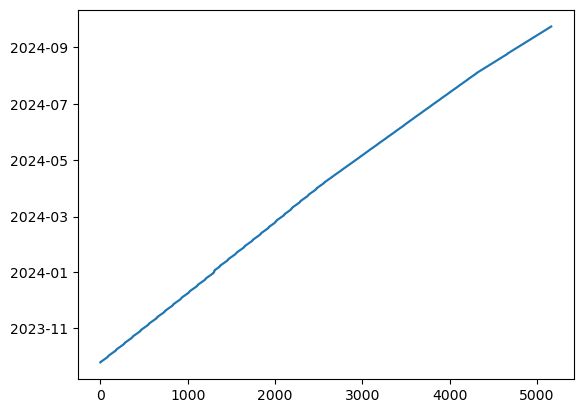

In [124]:
df['time'].plot()

In [126]:
df.dtypes

open                    int64
high                    int64
close                   int64
low                     int64
time      datetime64[ns, UTC]
volume                  int64
dtype: object

In [128]:
df['year']=df['time'].dt.strftime('%Y')
df['month']=df['time'].dt.strftime('%m')
df['day']=df['time'].dt.strftime('%d')
df['year_month']=df['time'].dt.strftime('%Y_%m')
df['hour']=df['time'].dt.strftime('%H')
df['minute']=df['time'].dt.strftime('%M')

In [129]:
df['year_month'].value_counts()

year_month
2024_08    512
2024_07    457
2024_05    455
2024_04    438
2024_06    437
2023_10    411
2023_12    404
2023_11    402
2024_03    399
2024_01    396
2024_09    385
2024_02    381
2023_09     86
Name: count, dtype: int64

In [132]:
df['hour'].value_counts().sort_index()

hour
04     50
05     49
06    269
07    363
08    364
09    363
10    363
11    363
12    364
13    364
14    365
15    364
16    306
17    304
18    304
19    304
20    304
Name: count, dtype: int64

In [134]:
df[df['hour'] == '04']

,open,high,close,low,time,volume,year,month,day,year_month,hour,minute
4324,284,287,284,284,2024-08-05 04:00:00+00:00,2305,2024,08,05,2024_08,04,00
4341,277,277,277,275,2024-08-06 04:00:00+00:00,32209,2024,08,06,2024_08,04,00
4358,277,279,279,277,2024-08-07 04:00:00+00:00,8382,2024,08,07,2024_08,04,00
4375,282,284,283,281,2024-08-08 04:00:00+00:00,17299,2024,08,08,2024_08,04,00
4392,282,282,281,281,2024-08-09 04:00:00+00:00,6888,2024,08,09,2024_08,04,00
4409,281,281,281,280,2024-08-10 04:00:00+00:00,1472,2024,08,10,2024_08,04,00
4426,279,280,279,279,2024-08-11 04:00:00+00:00,6200,2024,08,11,2024_08,04,00
4443,280,280,279,279,2024-08-12 04:00:00+00:00,4626,2024,08,12,2024_08,04,00
4460,281,281,281,280,2024-08-13 04:00:00+00:00,3773,2024,08,13,2024_08,04,00
4477,282,284,284,282,2024-08-14 04:00:00+00:00,22021,2024,08,14,2024_08,04,00


## BaseLine

In [59]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np
from matplotlib import  pyplot as plt

# Функция для добавления целевой переменной (таргета)
def add_target(df):
    df['close_next_hour'] = df['close'].shift(-1)
    df['target'] = (df['close_next_hour'] > df['close']).astype(int)
    df = df.dropna(subset=['close_next_hour'])
    return df

# Первый метод: фильтрация строк, где таргет не определён (например, NaN в close_next_hour)
def filter_invalid_targets(df):
    # Удаляем строки, где close_next_hour или target равен NaN
    return df.dropna(subset=['close_next_hour', 'target'])


# Функция для обучения и оценки модели с подбором порогов
def train_and_evaluate_model_with_thresholds(data, feature_cols, test_months=2, quantiles=[0.5, 0.7, 0.95]):
    # Преобразуем столбец времени к формату datetime (если еще не сделано)
    data['time'] = pd.to_datetime(data['time'])
    
    # Определим дату, начиная с которой выделим тестовую выборку (последние test_months месяцев)
    test_start_date = data['time'].max() - pd.DateOffset(months=test_months)
    
    # Разделение данных на тренировочную и тестовую выборки по времени
    train_data = data[data['time'] < test_start_date]
    test_data = data[data['time'] >= test_start_date]
    
    # Признаки, которые будем использовать
    features = feature_cols #['open', 'high', 'low', 'close', 'volume']
    
    # Разделение на признаки (X) и целевую переменную (y)
    X_train = train_data[features]
    y_train = train_data['target']
    X_test = test_data[features]
    y_test = test_data['target']
    
    # Модель дерева решений
    clf = DecisionTreeClassifier(max_depth=4, random_state=42)
    clf.fit(X_train, y_train)
    
    # Прогноз вероятностей на тренировочной и тестовой выборках
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    

    # Печать таблицы метрик
    print(f'{"Train Accuracy":<15}'
          f'{"Test Accuracy":<15}')
    print("-" * 50)   
    
    print(f'{accuracy_score(y_train, y_train_pred):<15.2f} {accuracy_score(y_test, y_test_pred):<15.2f}')

    # Расчет метрик для случайного предсказания
    random_pred = np.random.choice([0, 1], size=len(y_test), p=[1 - y_test.mean(), y_test.mean()])
    
    print("\nMetrics for Random Predictions:")
    print(f'Accuracy: {accuracy_score(y_test, random_pred):.2f}')


In [61]:
# Добавляем целевую переменную (таргет)
data = filter_invalid_targets(add_target(df))

feature_cols = ['open', 'high', 'low', 'close', 'volume']

# Вызываем функцию для обучения и оценки модели
train_and_evaluate_model_with_thresholds(data, feature_cols, test_months=2)

Train Accuracy Test Accuracy  
--------------------------------------------------
0.81            0.72           

Metrics for Random Predictions:
Accuracy: 0.70


## Лаги

In [67]:
def create_lag_features(df, features, lag_periods):
    """
    Добавляет лаги для указанных признаков на указанное количество периодов назад.
    
    df: DataFrame с исходными данными
    features: список признаков, для которых необходимо добавить лаги
    lag_periods: сколько лагов назад необходимо создать
    Возвращает: 
    - обновленный DataFrame с лагами
    - список новых колонок, которые можно использовать как признаки
    """
    df = df.copy()  # Работаем с копией DataFrame
    new_columns = []  # Список для хранения новых колонок
    
    # Для каждого признака создаем лаги
    for feature in features:
        for lag in range(1, lag_periods + 1):
            new_col_name = f'{feature}_lag_{lag}'
            df[new_col_name] = df[feature].shift(lag)
            new_columns.append(new_col_name)
    
    # Удаляем строки с NaN значениями, которые появились из-за сдвигов
    df = df.dropna()
    
    return df, new_columns

In [69]:
# Добавляем целевую переменную (таргет)
data = filter_invalid_targets(add_target(df))

# Добавление лагов перед вызовом модели
lag_periods = 30  # Например, 3 периода назад
features_to_lag = ['open', 'high', 'low', 'close', 'volume']

# Создаем лаги в данных
data_with_lags, new_columns = create_lag_features(data, features_to_lag, lag_periods)

feature_cols = features_to_lag + new_columns

# Вызываем функцию для обучения и оценки модели с порогами
train_and_evaluate_model_with_thresholds(data_with_lags, feature_cols, test_months=2)

Train Accuracy Test Accuracy  
--------------------------------------------------
0.81            0.78           

Metrics for Random Predictions:
Accuracy: 0.69


In [71]:
len(new_columns)

150

## Статистики по окну

In [75]:
def create_rolling_features(df, features, window_sizes):
    """
    Добавляет скользящие характеристики для указанных признаков и окон.
    
    df: DataFrame с исходными данными
    features: список признаков, для которых необходимо добавить скользящие характеристики
    window_sizes: список размеров окон для расчета характеристик (например, [5, 14, 30])
    
    Возвращает:
    - обновленный DataFrame с новыми фичами
    - список новых колонок, которые можно использовать как признаки
    """
    df = df.copy()  # Работаем с копией DataFrame
    new_columns = []  # Список для хранения новых колонок
    
    # Для каждого признака и для каждого окна
    for feature in features:
        for window_size in window_sizes:
            # Скользящее среднее
            df[f'{feature}_mean_{window_size}'] = df[feature].rolling(window=window_size).mean()
            new_columns.append(f'{feature}_mean_{window_size}')
            
            # Скользящая медиана
            df[f'{feature}_median_{window_size}'] = df[feature].rolling(window=window_size).median()
            new_columns.append(f'{feature}_median_{window_size}')
            
            # Скользящий минимум
            df[f'{feature}_min_{window_size}'] = df[feature].rolling(window=window_size).min()
            new_columns.append(f'{feature}_min_{window_size}')
            
            # Скользящий максимум
            df[f'{feature}_max_{window_size}'] = df[feature].rolling(window=window_size).max()
            new_columns.append(f'{feature}_max_{window_size}')
            
            # Скользящее стандартное отклонение
            df[f'{feature}_std_{window_size}'] = df[feature].rolling(window=window_size).std()
            new_columns.append(f'{feature}_std_{window_size}')
            
            # Скользящий размах (макс - мин)
            df[f'{feature}_range_{window_size}'] = df[f'{feature}_max_{window_size}'] - df[f'{feature}_min_{window_size}']
            new_columns.append(f'{feature}_range_{window_size}')
            
            # Скользящее абсолютное отклонение от медианы (mad)
            df[f'{feature}_mad_{window_size}'] = df[feature].rolling(window=window_size).apply(lambda x: np.median(np.abs(x - np.median(x))), raw=True)
            new_columns.append(f'{feature}_mad_{window_size}')
    
    # Удаление строк с NaN значениями, которые появляются из-за сдвигов
    df = df.dropna()
    
    return df, new_columns


In [77]:
# Добавляем целевую переменную (таргет)
data = filter_invalid_targets(add_target(df))

# Параметры для создания скользящих характеристик
window_sizes = [5, 14, 30]
features_to_rolling = ['open', 'high', 'low', 'close', 'volume']

# Создаем скользящие характеристики
data_with_rolling, new_rolling_features = create_rolling_features(data, features_to_rolling, window_sizes)

feature_cols = features_to_rolling + new_rolling_features

# Вызываем функцию для обучения и оценки модели с порогами, используя новые фичи
train_and_evaluate_model_with_thresholds(data_with_rolling, feature_cols, test_months=2)

Train Accuracy Test Accuracy  
--------------------------------------------------
0.81            0.76           

Metrics for Random Predictions:
Accuracy: 0.69


In [78]:
len(new_rolling_features)

105

## Трендовые фичи и тех. индикаторы

In [82]:
def create_trend_features(df, features, lag_periods):
    """
    Добавляет классические финансовые признаки: отношение к предыдущим периодам, логарифмические изменения и индикаторы трендов.
    
    df: DataFrame с исходными данными
    features: список признаков, для которых необходимо добавить индикаторы
    lag_periods: сколько периодов назад учитывать для расчетов
    
    Возвращает:
    - обновленный DataFrame с новыми фичами
    - список новых колонок, которые можно использовать как признаки
    """
    df = df.copy()  # Работаем с копией DataFrame
    new_columns = []  # Список для хранения новых колонок
    
    for feature in features:
        # Отношение текущего значения к предыдущему (лаг = 1)
        df[f'{feature}_ratio_1'] = df[feature] / df[feature].shift(1)
        new_columns.append(f'{feature}_ratio_1')
        
        # Логарифмическое изменение (логарифм отношения текущего значения к предыдущему)
        df[f'{feature}_log_diff_1'] = np.log(df[feature] / df[feature].shift(1))
        new_columns.append(f'{feature}_log_diff_1')
        
        # Momentum (разница между текущим значением и значением N периодов назад)
        df[f'{feature}_momentum_{lag_periods}'] = df[feature] - df[feature].shift(lag_periods)
        new_columns.append(f'{feature}_momentum_{lag_periods}')
        
        # Rate of Change (ROC): процентное изменение за N периодов
        df[f'{feature}_roc_{lag_periods}'] = (df[feature] - df[feature].shift(lag_periods)) / df[feature].shift(lag_periods) * 100
        new_columns.append(f'{feature}_roc_{lag_periods}')
        
        # Exponential Moving Average (EMA) с периодом N
        df[f'{feature}_ema_{lag_periods}'] = df[feature].ewm(span=lag_periods, adjust=False).mean()
        new_columns.append(f'{feature}_ema_{lag_periods}')
    
    # Удаление строк с NaN значениями, которые появились из-за сдвигов
    df = df.dropna()
    
    return df, new_columns


In [84]:
def create_macd(df, feature, short_window=12, long_window=26):
    """
    Добавляет индикатор MACD (разница между краткосрочным и долгосрочным EMA).
    
    df: DataFrame с исходными данными
    feature: признак, для которого необходимо рассчитать MACD
    short_window: окно для краткосрочного EMA (по умолчанию 12)
    long_window: окно для долгосрочного EMA (по умолчанию 26)
    
    Возвращает:
    - обновленный DataFrame с MACD
    - название новой колонки с MACD
    """
    df = df.copy()
    
    # Рассчитываем краткосрочное и долгосрочное EMA
    ema_short = df[feature].ewm(span=short_window, adjust=False).mean()
    ema_long = df[feature].ewm(span=long_window, adjust=False).mean()
    
    # Разница между краткосрочным и долгосрочным EMA (MACD)
    df[f'{feature}_macd'] = ema_short - ema_long
    
    return df, f'{feature}_macd'

In [86]:
# Добавляем целевую переменную (таргет)
data = filter_invalid_targets(add_target(df))

# Параметры для создания трендовых признаков
lag_periods = 3  # Например, 3 периода назад
features_to_trend = ['open', 'high', 'low', 'close', 'volume']

# Создаем трендовые признаки
data_with_trend, new_trend_features = create_trend_features(data, features_to_trend, lag_periods)

# Добавляем MACD для признака 'close'
data_with_trend, macd_column = create_macd(data_with_trend, 'close')

# Добавляем название колонки с MACD в список новых фичей
new_trend_features.append(macd_column)

# Вызываем функцию для обучения и оценки модели с порогами, используя новые фичи
train_and_evaluate_model_with_thresholds(data_with_trend, new_trend_features, test_months=2)

Train Accuracy Test Accuracy  
--------------------------------------------------
0.82            0.80           

Metrics for Random Predictions:
Accuracy: 0.70


## Важность признаков

In [90]:
# Функция для обучения и оценки модели с выводом feature importance по методу Split (permutation importance)
from sklearn.inspection import permutation_importance

def train_and_evaluate_model_with_split_importance(data, feature_cols, test_months=2):
    # Преобразуем столбец времени к формату datetime (если еще не сделано)
    data['time'] = pd.to_datetime(data['time'])
    
    # Определим дату, начиная с которой выделим тестовую выборку (последние test_months месяцев)
    test_start_date = data['time'].max() - pd.DateOffset(months=test_months)
    
    # Разделение данных на тренировочную и тестовую выборки по времени
    train_data = data[data['time'] < test_start_date]
    test_data = data[data['time'] >= test_start_date]
    
    # Признаки, которые будем использовать
    features = feature_cols 
    
    # Разделение на признаки (X) и целевую переменную (y)
    X_train = train_data[features]
    y_train = train_data['target']
    X_test = test_data[features]
    y_test = test_data['target']
    
    # Модель дерева решений
    clf = DecisionTreeClassifier(max_depth=4, random_state=42)
    clf.fit(X_train, y_train)
    
    # Прогнозы
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    # Печать точности модели
    print(f'Train Accuracy: {accuracy_score(y_train, y_train_pred):.2f}')
    print(f'Test Accuracy: {accuracy_score(y_test, y_test_pred):.2f}')
    
    perm_importance = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42)
    feature_importance = perm_importance.importances_mean

    return clf, feature_importance


In [91]:
# Добавляем целевую переменную (таргет)
data = filter_invalid_targets(add_target(df))

feature_cols = ['open', 'high', 'low', 'close', 'volume']

# Вызываем функцию для обучения и оценки модели
model, feature_importance_perm = train_and_evaluate_model_with_split_importance(data, feature_cols, test_months=2)

Train Accuracy: 0.81
Test Accuracy: 0.72


In [93]:
model

DecisionTreeClassifier(max_depth=4, random_state=42)

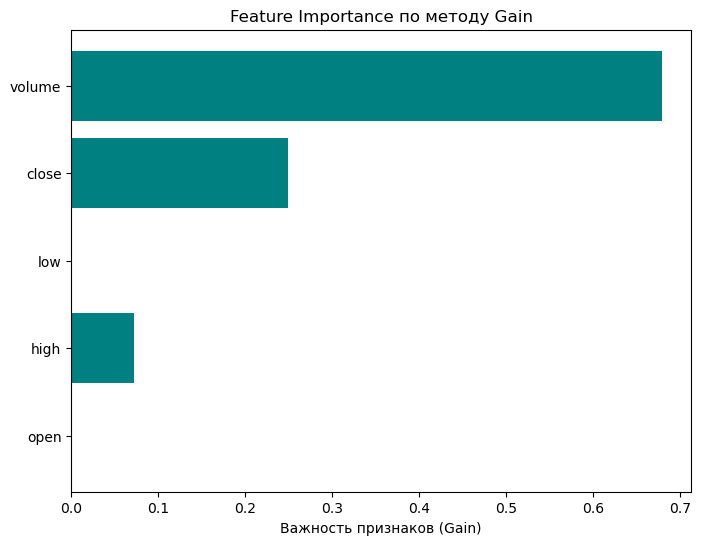

In [94]:
# Оценка важности признаков по методу Gain
feature_importance = model.feature_importances_

# Визуализация feature importance
plt.figure(figsize=(8, 6))
plt.barh(feature_cols, feature_importance, color='teal')
plt.xlabel('Важность признаков (Gain)')
plt.title('Feature Importance по методу Gain')
plt.show()

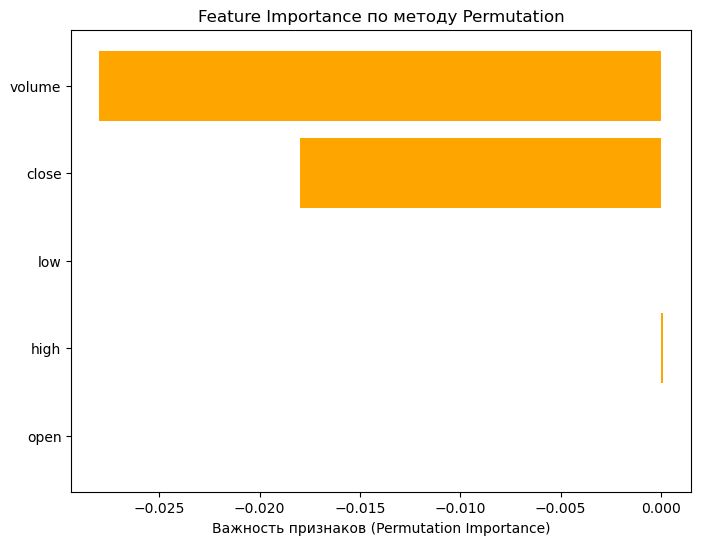

In [98]:
# Визуализация feature importance
plt.figure(figsize=(8, 6))
plt.barh(feature_cols, feature_importance_perm, color='orange')
plt.xlabel('Важность признаков (Permutation Importance)')
plt.title('Feature Importance по методу Permutation')
plt.show()

In [99]:
feature_importance_perm

array([ 0.00000000e+00,  9.78473581e-05,  0.00000000e+00, -1.80039139e-02,
       -2.79843444e-02])